### 1) Import Libraries and Load Data

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical data for S&P 500
ticker_sp500 = '^GSPC'

# Set dates for data fetching
start_date = '2000-01-01'
#end_date =

# Download data
data_sp500 = yf.download(ticker_sp500,start=start_date)

[*********************100%***********************]  1 of 1 completed


### 2) Basic Exploratory Data  Analysis

In [14]:
print(data_sp500.head())
print(data_sp500.describe())

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count   6503.000000  6503.000000  6503.000000  6503.000000  6.503000e+03
mean    2243.841180  2256.316090  2229.676961  2243.502217  3.410929e+09
std     1418.324195  1424.544485  1410.941720  1418.034839  1.511889e+09
min      676.530029   695.270020   

### 2.1) Visualization

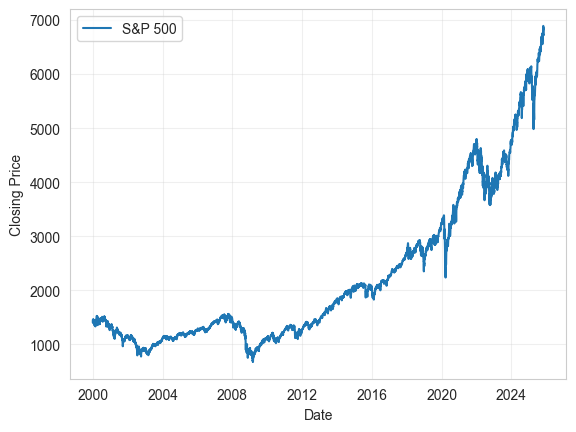

In [15]:
plt.plot(data_sp500.index, data_sp500['Close'], label = 'S&P 500')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(linestyle='-', alpha=0.3)
plt.show()

### 3) Data Preparation and Cleaning

In [17]:
#Extract closing prices
closing_prices_sp500 = data_sp500['Close']

# Since it is Pandas DataFrame, convert to Series
closing_prices_sp500 = closing_prices_sp500.iloc[:, 0]

# Align the data by date index
data = pd.DataFrame({'SP500': closing_prices_sp500})

# Remove missing values
data_clean = data.dropna()

# Calculate daily returns (percentage changes)
daily_returns_sp500 = data_clean['SP500'].pct_change()

# Remove the first row NaN
daily_returns_sp500_clean = daily_returns_sp500.dropna()

# Combine returns into DataFrame
returns_data = pd.DataFrame({'SP500_Returns': daily_returns_sp500_clean})

print(returns_data.head())
print(returns_data.describe())

            SP500_Returns
Date                     
2000-01-04      -0.038345
2000-01-05       0.001922
2000-01-06       0.000956
2000-01-07       0.027090
2000-01-10       0.011190
       SP500_Returns
count    6502.000000
mean        0.000310
std         0.012220
min        -0.119841
25%        -0.004737
50%         0.000637
75%         0.005892
max         0.115800


###  4) Calculate Key Statistics

In [20]:
# Calculate Mean and Std Deviation
mean_return_sp500 = returns_data['SP500_Returns'].mean()
std_return_sp500 = returns_data['SP500_Returns'].std()
print('S&P 500 statistics')
print(f"Mean Return: {mean_return_sp500*100:.4f}%")
print(f"Std Deviation: {std_return_sp500:.6f}")

# Annualize statistics
num_days = 252
annual_return_sp500 = mean_return_sp500 * num_days
annual_vol_sp500 = std_return_sp500 * np.sqrt(num_days)

print(f"Annual Return: {annual_return_sp500:.4f} ({annual_return_sp500*100:.2f}%)")
print(f"Annual Volatility: {annual_vol_sp500:.4f} ({annual_vol_sp500*100:.2f}%)")

S&P 500 statistics
Mean Return: 0.0310%
Std Deviation: 0.012220
Annual Return: 0.0782 (7.82%)
Annual Volatility: 0.1940 (19.40%)


In [24]:
# Initialize array to store simulation results
portfolio_values_over_time = np.zeros((num_simulations, num_days + 1))
portfolio_values_over_time[:, 0] = initial_portfolio_value

# Run simulations
for sim in range(num_simulations):

    # Generate random returns based on historical mean and volatility
    random_returns = np.random.normal(mean_return_sp500, std_return_sp500, num_days)

    # Calculate portfolio value over time using cumulative product
    current_value = initial_portfolio_value
    for day in range(num_days):
        current_value = current_value * (1 + random_returns[day])
        portfolio_values_over_time[sim, day + 1] = current_value

Monte Carlo simulation completed!
